In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def DataLoader(csv_file):
    """
    Load data from a CSV file into a pandas DataFrame.

    Parameters:
    - csv_file (str): The path to the CSV file.

    Returns:
    - pd.DataFrame: The loaded data.

    Raises:
    - FileNotFoundError: If the specified CSV file does not exist.
    - Exception: For any other unexpected errors during data loading.
    """
    try:
        data = pd.read_csv(csv_file)
        return data
    except FileNotFoundError:
        print(f"The file '{csv_file}' does not exist. Please provide a valid CSV file.")
    except Exception as e:
        print(f"Exception occurred while reading the file: {e}")
    

data = DataLoader("uber-dataset.csv")

if data is not None:
    data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)
    print(data.head())


            Date/Time      Lat      Lon    Base
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512


In [2]:
class DataProcessor:
    """
    A class for processing data by adding additional columns related to date and time.

    Parameters:
    - data (pd.DataFrame): The input DataFrame with a "Date/Time" column.

    Methods:
    - __init__(self, data): Constructor method to initialize the DataProcessor object with input data.
    - add_day_column(self): Adds a "Day" column to the data, representing the day of the month for each entry.
    - add_weekday_column(self): Adds a "Weekday" column to the data, representing the day of the week (0-6, Monday-Sunday) for each entry.
    - add_hour_column(self): Adds an "Hour" column to the data, representing the hour of the day for each entry.
    - process_data(): Convenience method that calls add_day_column, add_weekday_column, and add_hour_column in sequence.

    """
    def __init__(self, data):
        """
        Initialize a DataProcessor object with input data.

        Parameters:
        - data (pd.DataFrame): The input data to be processed.
        """
        self.data = data

    def add_day_column(self):
        """
        Add a new column named "Day" to the DataFrame, representing the day of the month for each entry.

        This method uses a lambda function to extract the day component from the "Date/Time" column and adds a new column
        to the DataFrame to store this information.
        
        The lambda function takes a datetime object from the "Date/Time" column and applies the `day` attribute to
        extract the day component.
        """
        self.data["Day"] = self.data["Date/Time"].apply(lambda x: x.day)

    def add_weekday_column(self):
        """
        Add a new column named "Weekday" to the DataFrame, representing the day of the week (0-6, Monday-Sunday) for each entry.

        This method uses a lambda function to extract the weekday component from the "Date/Time" column and adds a new column
        to the DataFrame to store this information.

        The lambda function takes a datetime object from the "Date/Time" column and applies the `weekday` method to
        extract the day of the week as an integer (0 for Monday, 1 for Tuesday, ..., 6 for Sunday).
        """
        self.data["Weekday"] = self.data["Date/Time"].apply(lambda x: x.weekday())

    def add_hour_column(self):
        """
        Add a new column named "Hour" to the DataFrame, representing the hour of the day for each entry.

        This method uses a lambda function to extract the hour component from the "Date/Time" column and adds a new column
        to the DataFrame to store this information.

        The lambda function takes a datetime object from the "Date/Time" column and applies the `hour` attribute to
        extract the hour component.
        """
        self.data["Hour"] = self.data["Date/Time"].apply(lambda x: x.hour)
        
    def process_data(self):
        """
        Execute the data processing methods in a predefined order: add_day_column, add_weekday_column, add_hour_column.
        """
        self.add_day_column()
        self.add_weekday_column()
        self.add_hour_column()

try:    
    if data is None:
        raise TypeError
    data_processor = DataProcessor(data)
    data_processor.process_data()
    print(data_processor.data.head())
except TypeError:
    print("Exception occured, data is None")
except Exception as e:
    print("Exception occured: ",e)

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


In [3]:
class DataVisualizer:
    """
    A class for visualizing the distribution of specific columns in a DataFrame using seaborn and matplotlib.

    Parameters:
    - data (pd.DataFrame): The input DataFrame with columns to visualize.
    
    Methods:
    - __init__(self, data): Constructor method to initialize the DataVisualizer object with input data.
    - set_seaborn_plot_size(figsize=(12, 10)): Sets the size of seaborn plots.
    - plot_day_distribution(self): Plots the distribution of trips per day.
    - plot_hour_distribution(self): Plots the distribution of trips per hour.
    - plot_weekday_distribution(self): Plots the distribution of trips per weekday.
    - plot_trips_per_base(self): Plots the number of trips per base.
    
    """
    def __init__(self, data):
        """
        Initialize a DataVisualizer object with input data.

        Parameters:
        - data (pd.DataFrame): The input data for visualization.
        """
        self.data = data

    def set_seaborn_plot_size(self, figsize=(12, 10)):
        """
        Sets the size of seaborn plots.

        Parameters:
        - figsize (tuple): A tuple representing the width and height of the plot. Default is (12, 10).
        """
        sns.set(rc={'figure.figsize': figsize})

    def plot_day_distribution(self):
        """
        Plot the distribution of trips per day.

        This method utilizes Seaborn's histplot function to create a histogram of the "Day" column in the DataFrame.
        The histogram is designed to show the frequency distribution of trips across different days of the month.

        Visualization Details:
        - Number of bins: 31, corresponding to the days of the month.
        - Kernel Density Estimate (KDE) is overlaid on the histogram to show the estimated probability density function.
        - Color of the plot is set to blue.

        Plot Details:
        - Title: "Trips per Day"
        - X-axis Label: "Day"
        - Y-axis Label: "Density"
        - X-axis Ticks: Displayed for each day (1 to 31).

        Error Handling:
        - If an exception occurs during the plotting process, an error message is printed.
        """
        try:
            sns.histplot(self.data["Day"], bins=31, kde=True, color='blue')
            plt.title("Trips per Day")
            plt.xlabel("Day")
            plt.ylabel("Density")
            plt.xticks(range(31))
            plt.show()
        except Exception as e:
            print("Exception occurred while plotting day distribution: ",e)

    def plot_hour_distribution(self):
        """
        Plot the distribution of trips per hour.

        This method utilizes Seaborn's histplot function to create a histogram of the "Hour" column in the DataFrame.
        The histogram is designed to show the frequency distribution of trips across different hours of the day.

        Visualization Details:
        - Number of bins: 24, corresponding to the hours in a day.
        - Kernel Density Estimate (KDE) is overlaid on the histogram to show the estimated probability density function.
        - Color of the plot is set to red.

        Plot Details:
        - Title: "Trips per Hour"
        - X-axis Label: "Hour"
        - Y-axis Label: "Density"
        - X-axis Ticks: Displayed for each hour (0 to 23).
        
        Error Handling:
        - If an exception occurs during the plotting process, an error message is printed.
        """
        try:
            sns.histplot(self.data["Hour"], bins=24, kde=True, color='red')
            plt.title("Trips per Hour")
            plt.xlabel("Hour")
            plt.ylabel("Density")
            plt.xticks(range(24))
            plt.show()
        except Exception as e:
            print("Exception occurred while plotting hour distribution: ",e)

    def plot_weekday_distribution(self):
        """
        Plot the distribution of trips per weekday.

        This method utilizes Seaborn's histplot function to create a histogram of the "Weekday" column in the DataFrame.
        The histogram is designed to show the frequency distribution of trips across different days of the week.

        Visualization Details:
        - Number of bins: 7, corresponding to the days of the week (0-6, Monday-Sunday).
        - Kernel Density Estimate (KDE) is overlaid on the histogram to show the estimated probability density function.
        - Color of the plot is set to green.

        Plot Details:
        - Title: "Trips per Week"
        - X-axis Label: "Weekday"
        - Y-axis Label: "Density"
        - X-axis Ticks: Displayed for each day of the week, with labels ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'].
        
        Error Handling:
        - If an exception occurs during the plotting process, an error message is printed.
        """
        try:
            sns.histplot(self.data["Weekday"], bins=7, kde=True, color='green')
            plt.title("Trips per Week")
            plt.xlabel("Weekday")
            plt.ylabel("Density")
            plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
            plt.show()
        except Exception as e:
            print("Exception occurred while plotting weekday distribution: ",e)

    def plot_trips_per_base(self):
        """
        Plot the number of trips per base.

        This method creates a bar plot to visualize the distribution of trips among different bases.

        Plotting Details:
        - Bar plot is created using the value counts of the 'Base' column in the DataFrame.
        - Color of the bars is set to skyblue.

        Plot Details:
        - Title: "Trips per Base"
        - X-axis Label: "Base"
        - Y-axis Label: "Number of Trips"
        
        Error Handling:
        - If an exception occurs during the plotting process, an error message is printed.
        """
        try:
            base_counts = self.data['Base'].value_counts()
            base_counts.plot(kind='bar', color='skyblue')
            plt.title("Trips per Base")
            plt.xlabel("Base")
            plt.ylabel("Number of Trips")
            plt.show()
        except Exception as e:
            print("Exception occurred while plotting trips per base: ",e)

try:
    if data is None:
        raise TypeError
    data_visualizer = DataVisualizer(data)
    data_visualizer.set_seaborn_plot_size()
except TypeError:
    print("Exception occured, data is None")
except Exception as e:
    print("Exception occured: ",e)

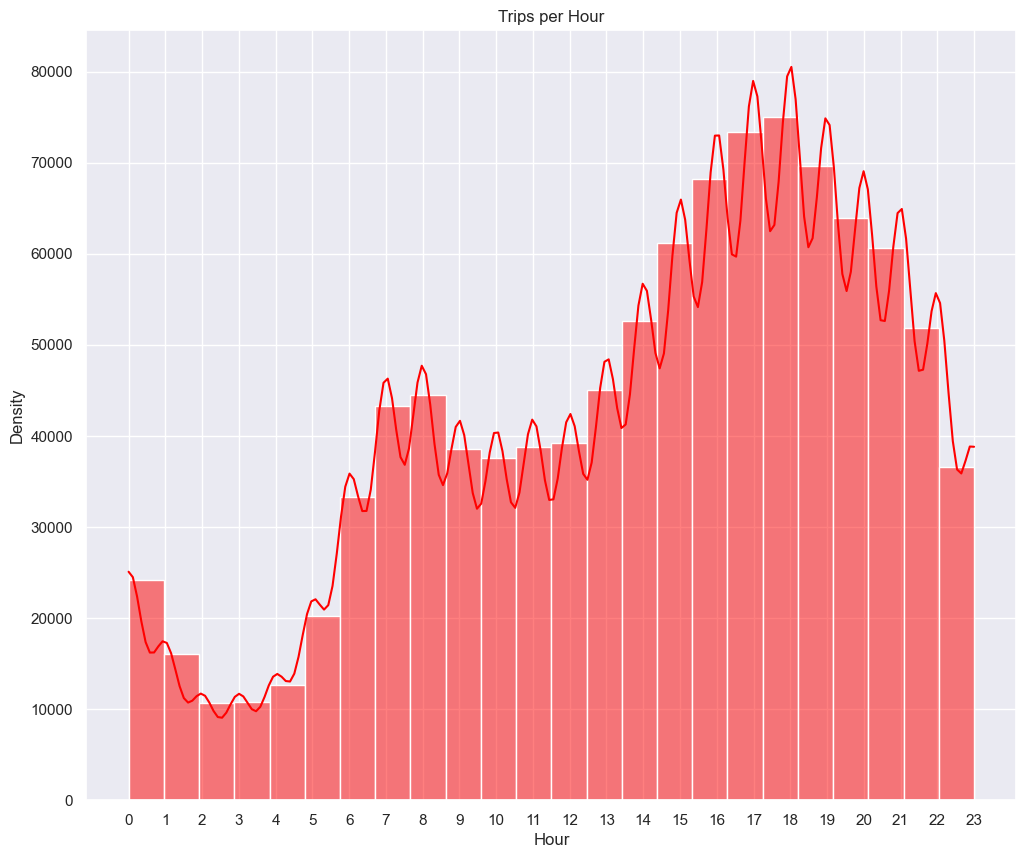

In [4]:
data_visualizer.plot_hour_distribution()

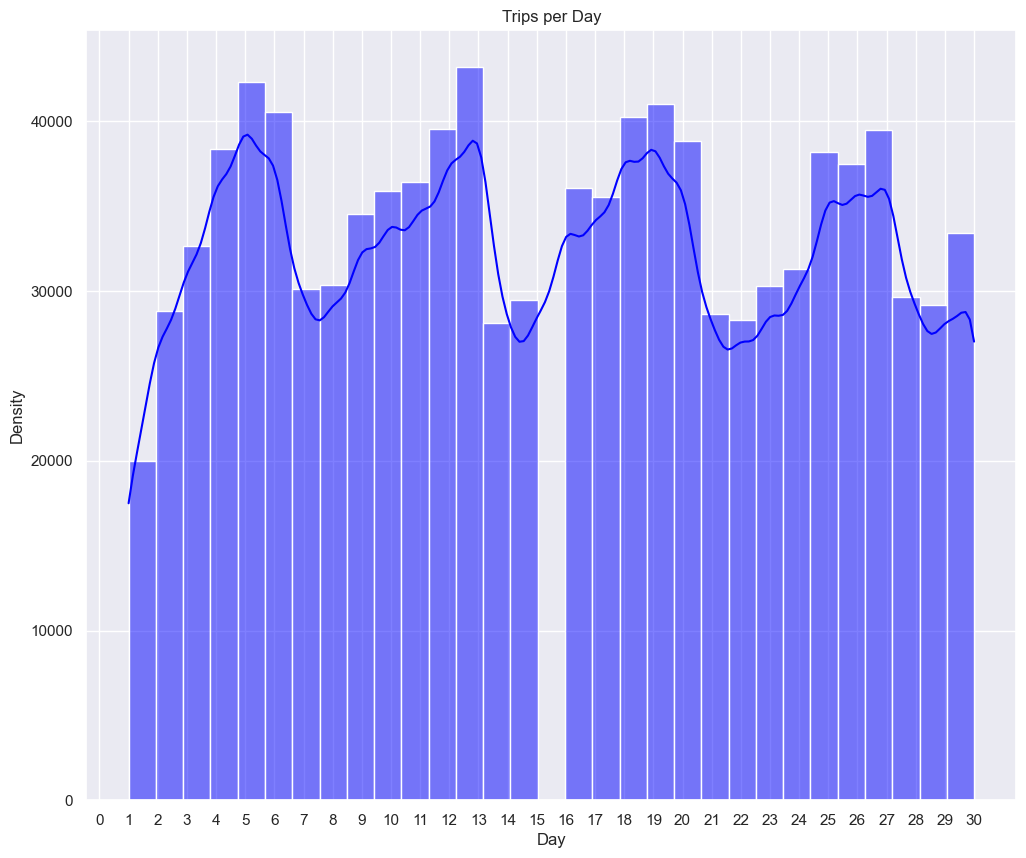

In [5]:
data_visualizer.plot_day_distribution()

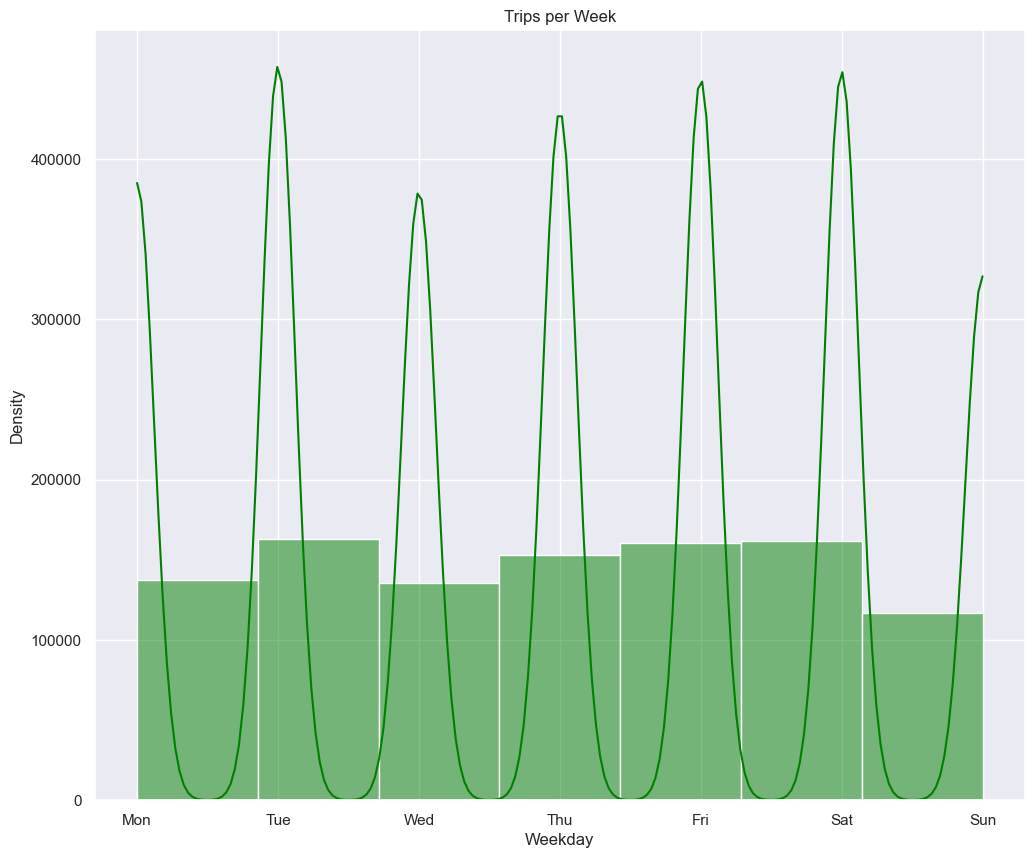

In [6]:
data_visualizer.plot_weekday_distribution()

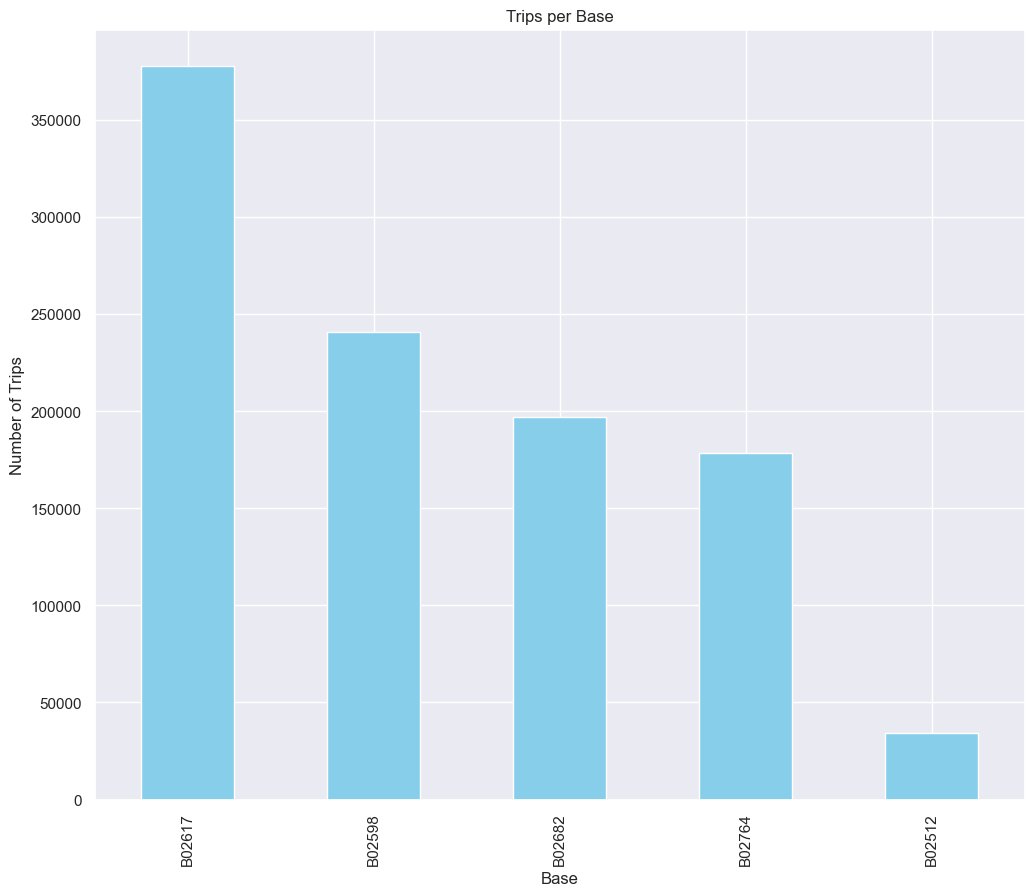

In [7]:
data_visualizer.plot_trips_per_base()

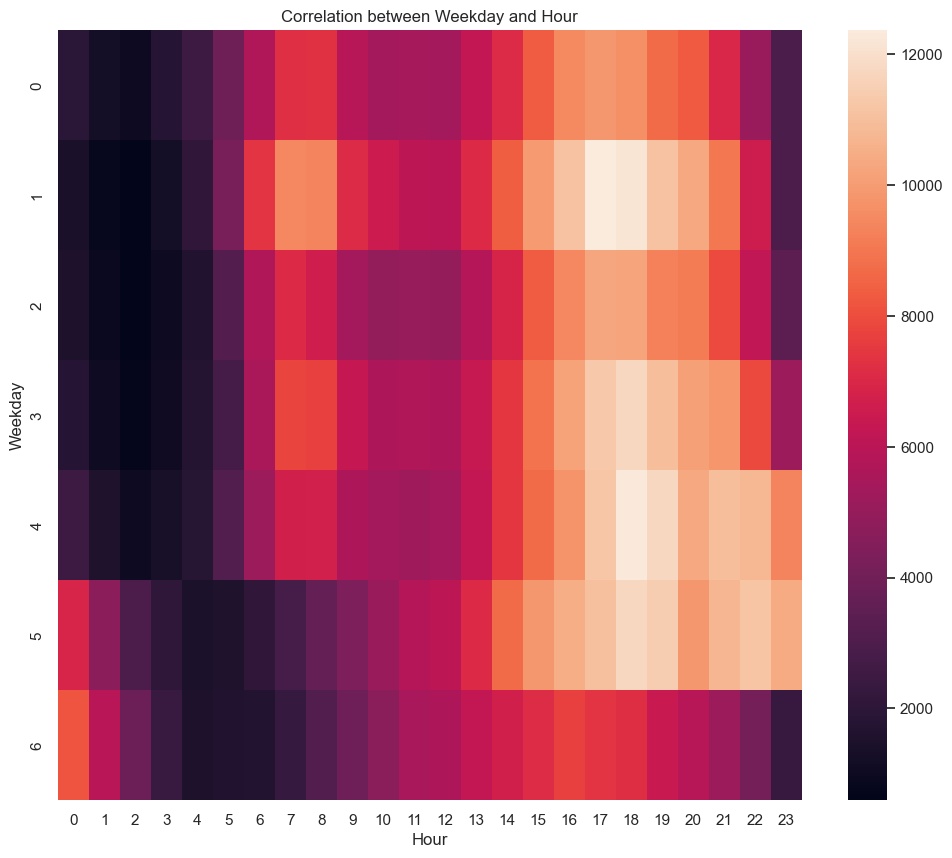

In [8]:
def correlation_heatmap():
    """
    Generates a heatmap to visualize the correlation between the 'Weekday' and 'Hour' columns in a DataFrame.

    This function performs the following steps:
    1. Groups the DataFrame by the 'Weekday' and 'Hour' columns using groupby.
    2. Applies a lambda function to calculate the length of each group, essentially counting the occurrences.
    3. Reshapes the resulting DataFrame using unstack to make it suitable for a heatmap.
    4. Plots a heatmap using seaborn's heatmap function with the reshaped DataFrame.
    5. Sets the plot title to 'Correlation between Weekday and Hour'.
    6. Displays the heatmap.

    """
    df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))
    df = df.unstack()
    sns.heatmap(df, annot=False)
    plt.title('Correlation between Weekday and Hour')
    plt.show()
        
correlation_heatmap()

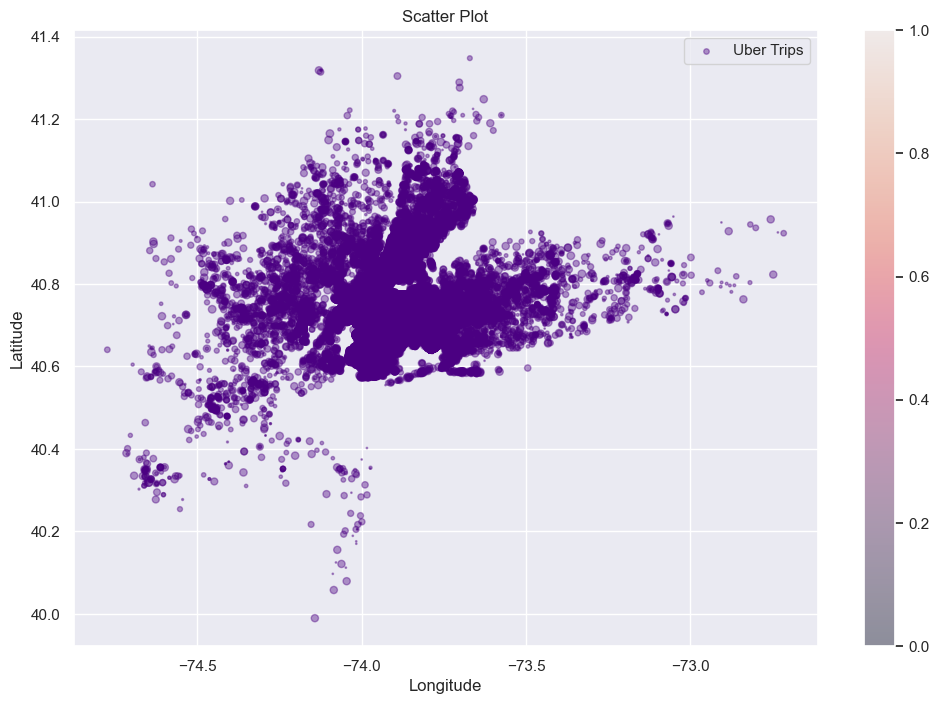

In [9]:
def scatter_plot():
    """
    Creates a scatter plot to analyze Uber trips based on geographical coordinates and the number of trips per day.

    This function performs the following steps:
    1. Creates a scatter plot using matplotlib's scatter function.
    2. Uses the longitude ('Lon') and latitude ('Lat') columns as x and y coordinates, respectively.
    3. Sets the alpha parameter to control the transparency of the markers (alpha=0.4).
    4. Scales the marker size ('s') based on the number of trips per day ('Day' column).
    5. Adds a colorbar to the plot to represent the scale of the marker sizes.
    6. Sets the plot title to 'Uber Trips Analysis'.
    7. Sets the x-axis label to 'Longitude' and the y-axis label to 'Latitude'.
    8. Adds a legend to the plot with the label 'Uber Trips'.
    9. Displays the scatter plot.

    """
    fig, ax = plt.subplots(figsize=(12, 8))
    sc = ax.scatter(
        x=data['Lon'],
        y=data['Lat'],
        alpha=0.4,
        s=data['Day'],
        c='indigo',
        label='Uber Trips'
    )
    fig.colorbar(sc, ax=ax)
    ax.set_title("Scatter Plot")
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.legend()
    plt.show()
        
scatter_plot()